[Text(0.5, 1.0, 'Uptown Detail (94612)')]

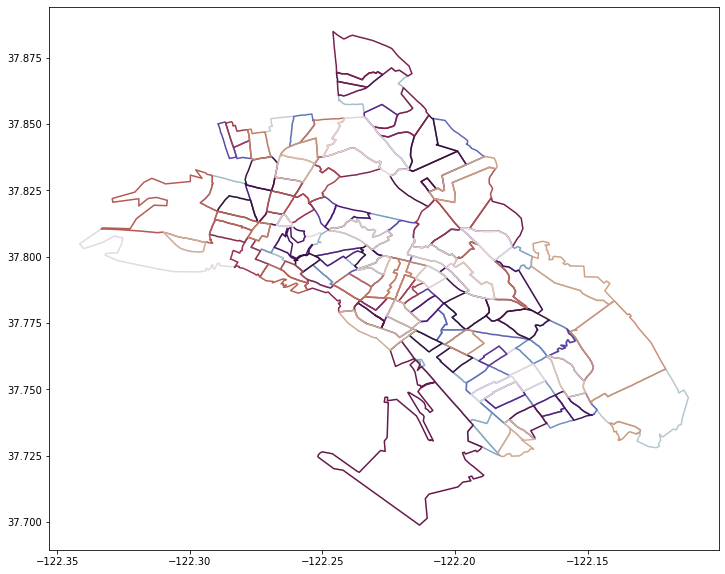

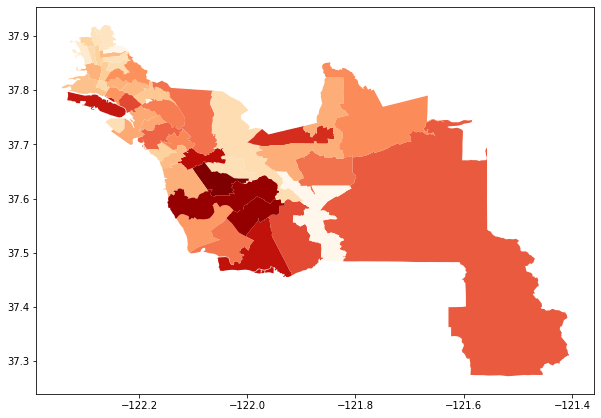

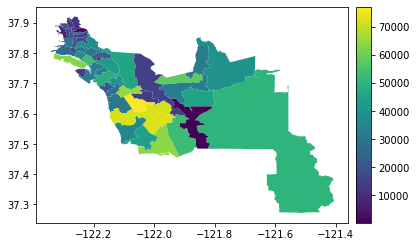

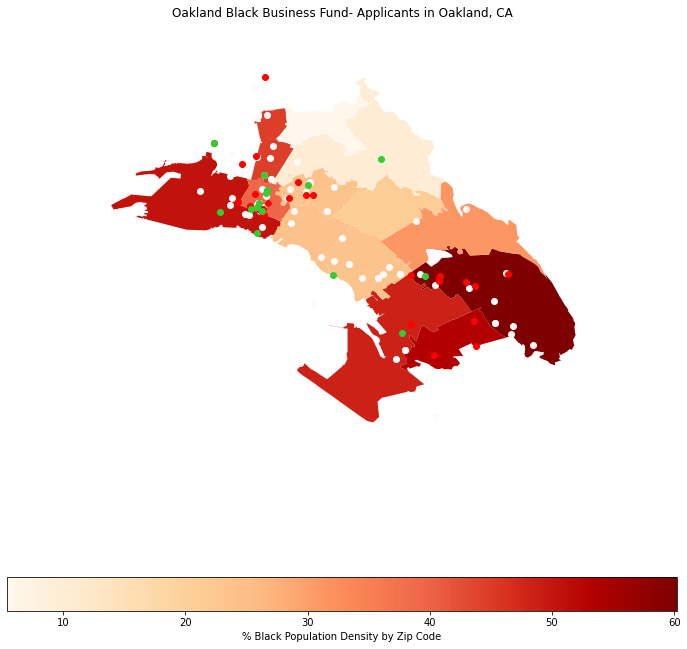

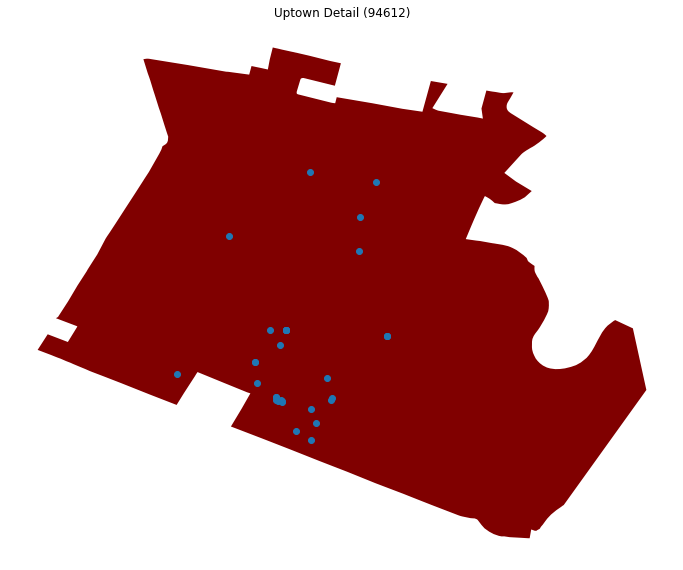

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#oakland neighborhood map
oakland = gpd.read_file('geo_export_0ec35598-2759-4a42-bcfd-5e160c4cf340.shp')
type(oakland)
oakland['area'] = oakland.area/10000000
oakland.boundary.plot(cmap = 'twilight', figsize=(12,12))

#alameda zipcode map
oakland2 = gpd.read_file('Zip_Code_Boundaries.shp')
oakland2.plot(cmap = 'OrRd', column = 'POPULATION', figsize=(10,10))

oakland2.head()

#with legend
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
oakland2.plot(column='POPULATION', ax=ax, legend=True, cax=cax)

#import oakland neighborhood map
oakland = gpd.read_file('geo_export_0ec35598-2759-4a42-bcfd-5e160c4cf340.shp')

#creating applicant plot dataframe
data = pd.read_csv("OBBFGeoDataFrame1.csv")
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

#create color categories for funding status
colorized = gdf['funding_status'].tolist()
colors = []
zorder = []
for x in colorized:
    if x == 'Funding completed':
        colors.append('lawngreen')
        zorder.append(3)
    elif x == 'Funding in Progress':
        colors.append('lawngreen')
        zorder.append(3)
    elif x == 'Denied':
        colors.append('red')
        zorder.append(2)
    else:
        colors.append('snow')
        zorder.append(1)

gdf['colors'] = colors
gdf['zorder'] = zorder

funded = gdf[gdf['colors']=='lawngreen']
denied = gdf[gdf['colors']=='red']
waiting = gdf[gdf['colors']=='snow']

#merge black population stats
blackzips = pd.read_csv("blackzips.csv") 
oakland2.dtypes['ZIP_CODE']
#blackzips.ZIP_CODE.astype(int)
oakland2['ZIP_CODE']=oakland2['ZIP_CODE'].astype({"ZIP_CODE": int})
oakland2 = oakland2.merge(blackzips, how='outer', on='ZIP_CODE')
oakland2.head()
oakland2['% Blacks']=oakland2['% Blacks'].astype({"% Blacks": float})

#plot map
fig, ax = plt.subplots(1, 1, figsize=(12,12))
oakland2.plot(column='% Blacks', ax=ax,cmap='OrRd', legend=True,legend_kwds={'label': "% Black Population Density by Zip Code",'orientation': "horizontal"})
#oakland.plot(ax=ax, cmap='OrRd')
funded.plot(ax=ax, color='limegreen', zorder=3, legend=True)
denied.plot(ax=ax, color='red', zorder=2, legend=True)
waiting.plot(ax=ax, color='snow', zorder=1, legend=True)
ax.set(title='Oakland Black Business Fund- Applicants in Oakland, CA')
ax.axis('off')
plt.xlim(-122.357377,-122.101348)
plt.ylim( 37.671189,37.895222)

#plot map AOI

#isolate points within defined boundaries
uptown = oakland2[oakland2['ZIP_CODE']==94612]
pip = gdf.within(oakland2.loc[10, 'geometry'])
uptown1 = gdf.loc[pip].copy()
uptown1['business_name']=uptown1['Name of Business']

#Plot AOI Map


fig, ax = plt.subplots(1, 1, figsize=(12,12))
uptown.plot(ax=ax,color='maroon', figsize=(10,10))
uptown1.plot(ax=ax)
ax.axis('off')
ax.set(title='Uptown Detail (94612)')


labeling each datapoint with neighborhood, grouping and counting by neighborhood to create a histogram and heatmap based on applicant density per neighborhood.

TopologyException: side location conflict at -122.1393346786749 37.737391181756728


Text(0.5, 1.0, 'Applicants by Neighborhood')

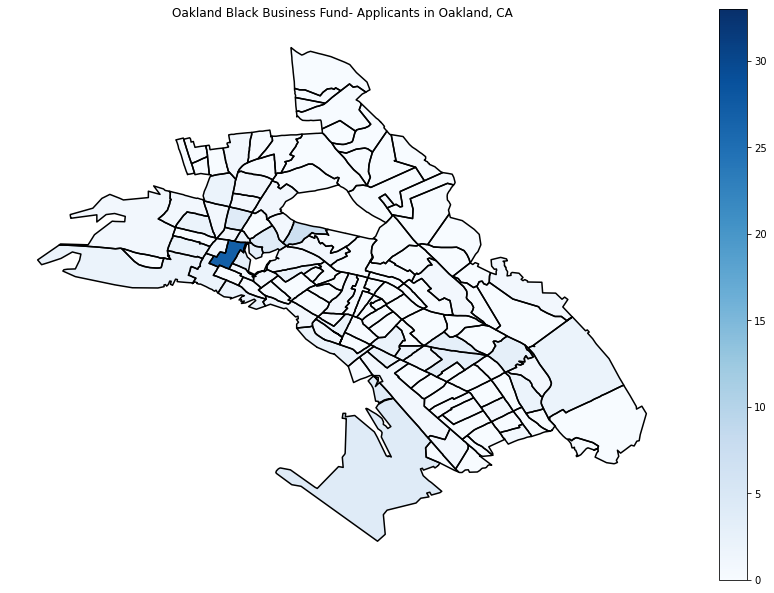

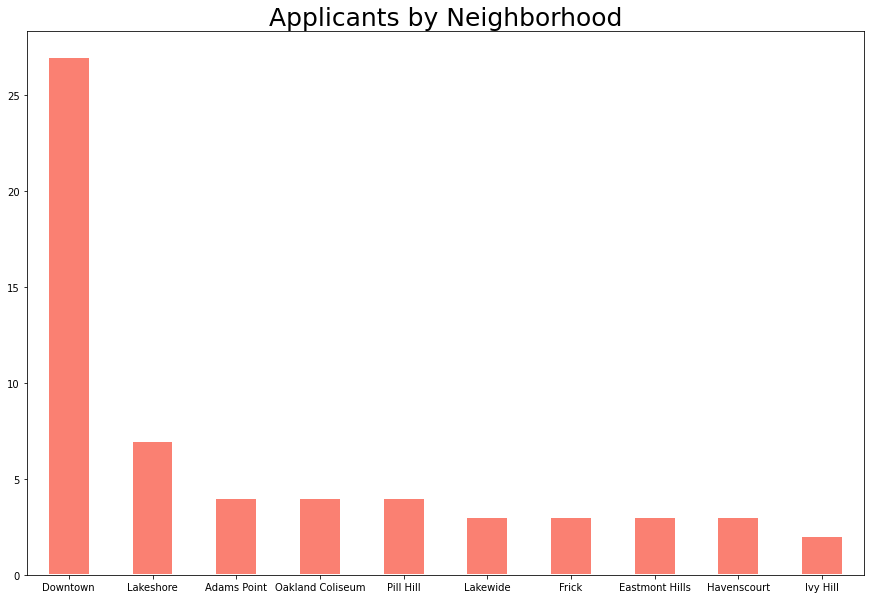

In [67]:
oakland = gpd.read_file('geo_export_0ec35598-2759-4a42-bcfd-5e160c4cf340.shp')
oakland['neighborhood']=oakland['name']
gdf['neighborhood']=''
neighborhoods = oakland['name'].tolist()
for x in neighborhoods:
    try:
        pts = oakland[oakland["neighborhood"] == x]
        pts.reset_index(drop = True, inplace = True)
        pip = gdf.within(pts.loc[0, 'geometry'])
        temp_neighborhood = gdf.loc[pip].copy()
        temp_neighborhood['neighborhood'] = x
        gdf.update(temp_neighborhood)
    except:
        pass
gdf['neighborhood'].tolist()
#downtown.shape
#label points on AOI
#fig, ax = plt.subplots(1, 1, figsize=(12,12))
#pts.plot(ax=ax,color='darksalmon', figsize=(10,10))
#downtown.plot(ax=ax)
#ax.set(title='Downtown Detail')

#create count by group
counted = gdf.groupby(['neighborhood']).size().reset_index(name='counts')
counted_sorted = counted.sort_values(by=['counts'], ascending=False)
oakland = oakland.merge(counted_sorted, how='outer', on='neighborhood')
oakland['counts'] = oakland['counts'].fillna(0)
oakland.astype({'counts': 'int'}).dtypes

vmin, vmax = 2, 10
fig, ax = plt.subplots(1,1, figsize=(15, 15))
oakland.plot(ax=ax, column='counts', cmap='Blues', legend=True,legend_kwds={'shrink': 0.7})
oakland.boundary.plot(ax=ax,color='black')
ax.set(title='Oakland Black Business Fund- Applicants in Oakland, CA')
ax.axis('off')

top10 = counted_sorted[1:11]
top10 = top10.replace('Not Named1', 'Oakland Coliseum')
top10 = top10.replace('Bancroft Business/ Havenscourt', 'Havenscourt')


ax = top10.plot(x='neighborhood', y='counts', kind='bar', color='salmon', edgecolor='white', linewidth=2, figsize=(15,10),  rot=0, legend=None)
ax.xaxis.set_label_text("")
plt.title("Applicants by Neighborhood", fontsize=25)
#ax = top10.plot.bar(x='neighborhood', y='counts',, width=.3, linewidth=10)

#gdf.to_csv('neighborhoods.csv')
#for x, y, label in zip(uptown1.geometry.x, uptown1.geometry.y, uptown1.business_name):
#    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")